In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

import scipy.stats as st
#import pingouin as pg
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, auc, roc_auc_score, roc_curve, plot_confusion_matrix, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression, RFE
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from statsmodels.api import OLS, add_constant

#import tensorflow as tf
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from keras.wrappers.scikit_learn import KerasClassifier
#from numpy.random import seed
#from tensorflow.random import set_seed
#from keras import backend as K

In [2]:
#import plotly
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import plotly.offline as py
#from plotly.graph_objs import Scatter, Layout
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.figure_factory as ff

In [3]:
# importing the data
df = pd.read_excel('data/drug_consumption.xls')
print(df.shape)
df.head(10)
print(df.columns)

(1885, 32)
Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')


In [4]:
#Checking for missing Values
df.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Shrooms      0
Nicotine     0
Semer        0
VSA          0
dtype: int64

# Data cleaningin and feature engineering

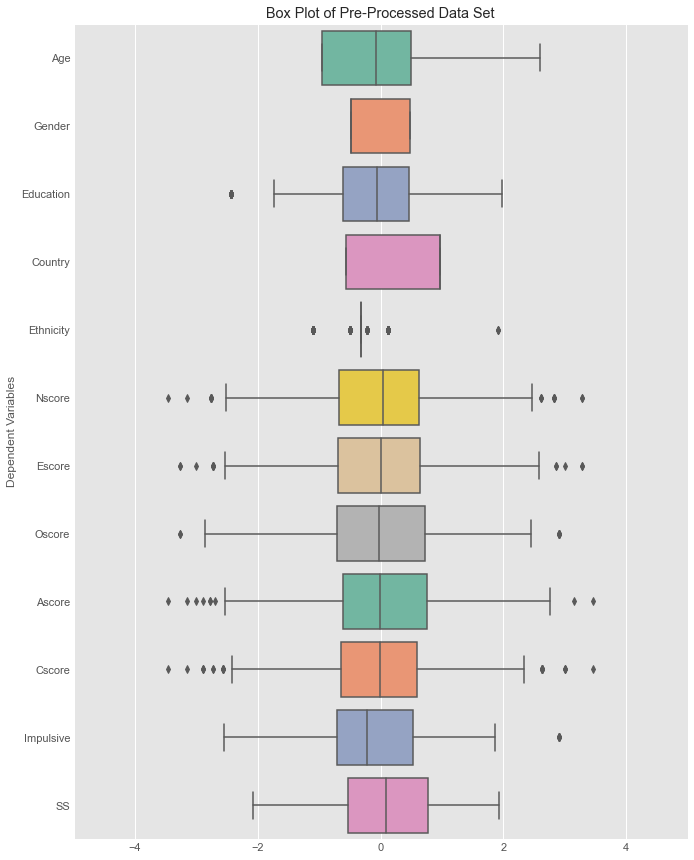

In [5]:
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(11, 15))

ax.set(xlim=(-5, 5))
plt.ylabel('Dependent Variables')
plt.title("Box Plot of Pre-Processed Data Set")
ax = sns.boxplot(data = df[feature_col_names], 
  orient = 'h', 
  palette = 'Set2')

In [6]:
# url to the dataset
url=f"https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"

In [7]:
# information on the variables
names=f"""ID	ID
Age	age
Gender	gender
Education	level of education
Country	country of current residence
Ethnicity	ethnicity
Nscore	NEO-FFI-R Neuroticism
Escore	NEO-FFI-R Extraversion
Oscore	NEO-FFI-R Openness
Ascore	NEO-FFI-R Agreeableness
Cscore	NEO-FFI-R Conscientiousness
Impulsive	BIS-11 Impulsiveness
SS	ImpSS sensation
Alcohol	alcohol consumption (output attribute)
Amphet	amphetamines consumption (output attribute)
Amyl	amyl nitrite consumption (output attribute)
Benzos	benzodiazepine consumption (output attribute)
Caff	caffeine consumption (output attribute)
Cannabis	cannabis consumption (output attribute)
Choc	chocolate consumption (output attribute)
Coke	cocaine consumption (output attribute)
Crack	crack consumption (output attribute)
Ecstasy	ecstasy consumption (output attribute)
Heroin	heroin consumption (output attribute)
Ketamine	ketamine consumption (output attribute)
Legalh	legal highs consumption (output attribute)
LSD	LSD consumption (output attribute)
Meth	methadone consumption (output attribute)
Mushrooms	magic mushrooms consumption (output attribute)
Nicotine	nicotine consumption (output attribute)
Semer	fictitious drug Semeron consumption (output attribute) Should be removed from our dataset, because of overclaiming observers!
VSA	volatile substance abuse consumption (output attribute)"""

In [8]:
# groups labels for categorical variables
age_lb=["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
gender_lb=["Male", "Female"]
education_lb=["Left before 16", "Left at 16", "Left at 17", "Left at 18","Left at Uni", "Certificate/Diploma", "University", "Masters", "PhD"]
country_lb=["USA", "New Zealand", "Other", "Australia",  "Republic of Ireland", "Canada", "UK"]
ethnicity_lb=["Black", "Asian", "White", "Mixed-White/Black", "Other", "Mixed-White/Asian", "Mixed-Black/Asian"]
user_lb=["Non-user", "Drug user"]

In [9]:
# personality test scores columns
scores= ["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]

In [10]:
# url to the dataset
url=f"https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"

In [11]:
# Download dataset with the column titles
def download(url, titles):
    df=pd.read_csv(url, header=None)
    titles = [row.split("\t") for row in titles.split(f"\n")]
    df.columns=pd.DataFrame(titles)[0]
    display(df.info())
    print(f"""Missing Values: """)
    display(df.isna().sum())
    print(f"""Sample of the dataset: """)
    display(df.head())
    return df

In [12]:
df=download(url, names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

None

Missing Values: 


0
ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

Sample of the dataset: 


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [13]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [14]:
# removing the ID column from dataset
df.drop(columns="ID", inplace=True)

In [15]:
# We found the persons or observations who exagertae about drugs they use so we deleted those observation and at the end we removed the Semer column!
def semer(df):
    display(df.Semer.value_counts())
    df.drop(df[df.Semer!="CL0"].index, axis=0, inplace=True)
    return df.drop(columns="Semer")

df=semer(df)

CL0    1877
CL2       3
CL1       2
CL3       2
CL4       1
Name: Semer, dtype: int64

## Non-numerical columns

In [16]:
## transforming the non-numerical columns
def non_num_transform(df):
    output= list(set(df.columns).difference(set(df._get_numeric_data().columns)))
    for o in output:
        le = LabelEncoder()
        df[o] = le.fit_transform(df[o])
    return output

output_attributes=non_num_transform(df)

In [17]:
output_attributes

['Alcohol',
 'Ecstasy',
 'Ketamine',
 'Amphet',
 'Choc',
 'Coke',
 'Nicotine',
 'Benzos',
 'Heroin',
 'Mushrooms',
 'Amyl',
 'Cannabis',
 'Meth',
 'LSD',
 'Caff',
 'Crack',
 'Legalh',
 'VSA']

## Hypothesis:

* Higher Nscore more probabilty of using hard drug.
* Higher Oscore more probabilty of using hard drug.
* lower Ascore more probabilty of using hard drug.
* lower Cscore more probabilty of using hard drug.
* Higher Impulsive more probabilty of using hard drug.
* Higher SS more probabilty of using hard drug.
* Men do more drugs than women.
* Young people use more drugs than older people.
* Low educated people use more drugs than less educated.

## Defining Hard Drugs:

In [18]:
# define what are hard drugs
hard_drugs=["Amphet", "Benzos", "Coke", "Crack", "Ecstasy", "Heroin", "Legalh", "Meth"]

In [19]:
# encode a new column to identify whether an individual is a hard drug user or not (with frequency>1)
def hard_drug_user(df, hard_drugs):
    df["hard"]=df[df[hard_drugs]>2].any(axis=1)
    print(f"The distribution of hard drug user:")
    display(df.hard.value_counts(normalize=True).round(2))
    print(f"Descriptive summary of the hard drug user vs non user on personality test scores:")
    display(df.groupby("hard").agg(["mean", "std", "median", "min", "max"]).round(2).stack()[["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]])
    return df

In [20]:
df=hard_drug_user(df, hard_drugs)

The distribution of hard drug user:


True     0.52
False    0.48
Name: hard, dtype: float64

Descriptive summary of the hard drug user vs non user on personality test scores:


Nscore  Escore  Oscore  Ascore  Cscore  Impulsive    SS
hard                                                                 
False mean     -0.18    0.05   -0.35    0.18    0.30      -0.30 -0.44
      std       0.92    0.92    0.92    0.93    0.91       0.92  0.87
      median   -0.15    0.00   -0.32    0.13    0.26      -0.22 -0.53
      min      -2.76   -2.73   -3.27   -2.90   -2.73      -2.56 -2.08
      max       3.27    2.86    2.90    3.16    3.46       2.90  1.92
True  mean      0.16   -0.05    0.31   -0.17   -0.27       0.28  0.38
      std       1.04    1.06    0.96    1.02    0.99       0.90  0.87
      median    0.22    0.00    0.29   -0.15   -0.28       0.19  0.40
      min      -3.46   -3.27   -2.86   -3.46   -3.46      -2.56 -2.08
      max       3.27    3.27    2.90    3.46    3.01       2.90  1.92

## Value	Description
0 - Never Used

1 - Used over a Decade Ago

2 - Used in Last Decade

3 - Used in Last Year

4 - Used in Last Month

5 - Used in Last Week

6 - Used in Last Day

In [21]:
# check whether the data is balanced
df.hard.value_counts()#(normalize=True)

True     982
False    895
Name: hard, dtype: int64

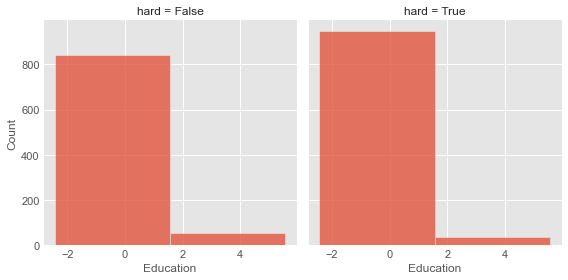

In [22]:
sns.displot(
    df, x="Education", col="hard",
    binwidth=4, height=4, facet_kws=dict(margin_titles=True),
)
#sns.displot(
#    df, x="Education", col="scores",
#    binwidth=4, height=4, facet_kws=dict(margin_titles=True),
#)

* People who use hard drugs are "obviously" less educated. 

In [23]:
def plot_demo(df, cat):
    plt.style.use('seaborn-whitegrid')
    graph_name="graph/hard drug user by {}.png"
    sns.set(style="white", font_scale = 1.5)
    for c in cat:
        f, ax = plt.subplots(figsize=(15, 7))
        label=eval(c.lower()+"_lb")
        p=round(pd.pivot_table(df[df.hard==True], values="hard", columns="Gender", index=c, aggfunc="count")/pd.pivot_table(df, values="hard", columns="Gender", index=c, aggfunc="count")*100, 2).reset_index().melt(id_vars=[c])
        g=sns.barplot(x=c, y="value", data=p, hue='Gender', palette=["b","r"])
        g.set_xticklabels(label)
        g.set_ylabel("Hard Drug User Percentage")
        g.set_xlabel(f"{c} Group")
        g.set_title(f"Distribution of Hard Drug User by {c} and Gender")
        for t, l in zip(g.legend().texts, gender_lb): t.set_text(l)
        g.set_xticklabels(g.get_xticklabels(), rotation=15)
        #plt.savefig(graph_name.format(c) , transparent=True)
        plt.show()
    return None

In [24]:
# define categories
cat=["Age", "Education", "Country", "Ethnicity"]

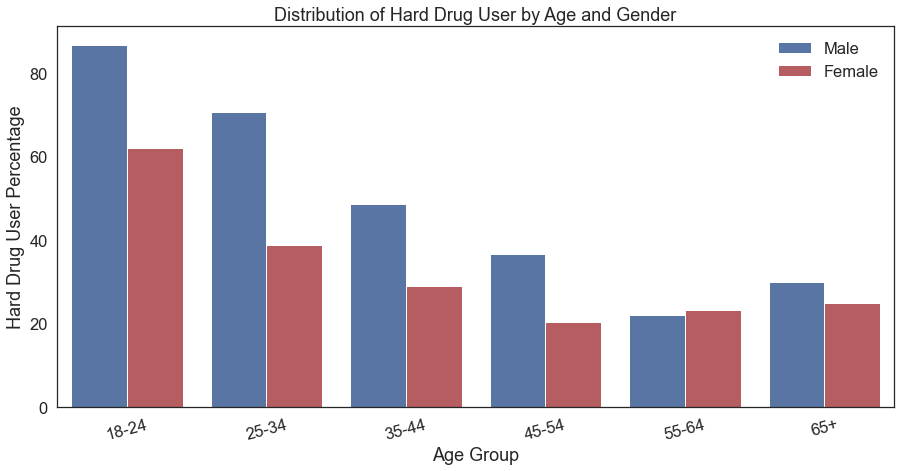

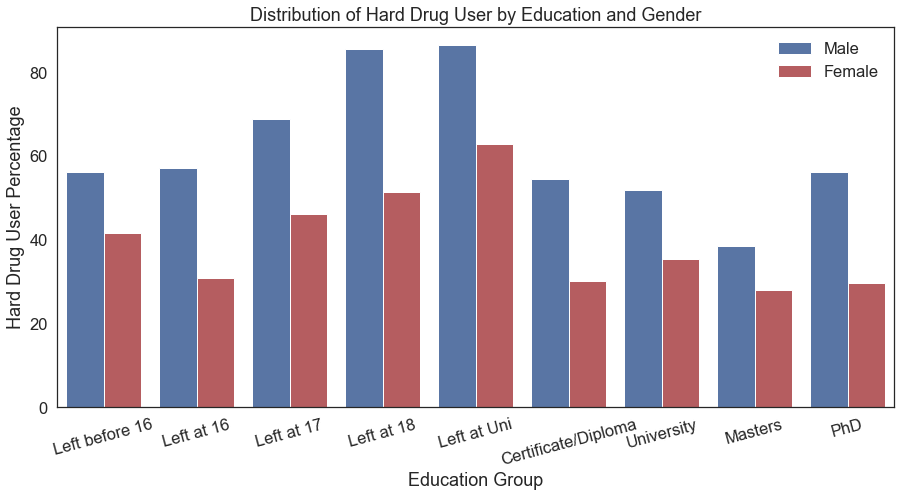

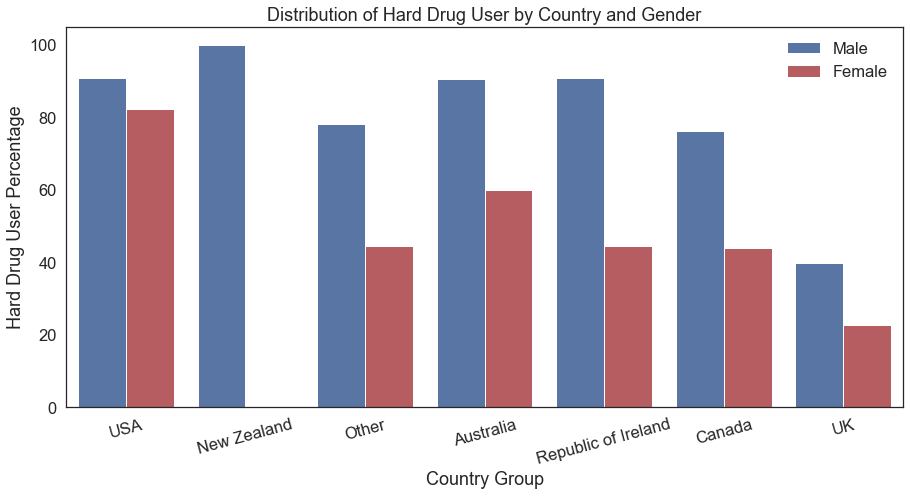

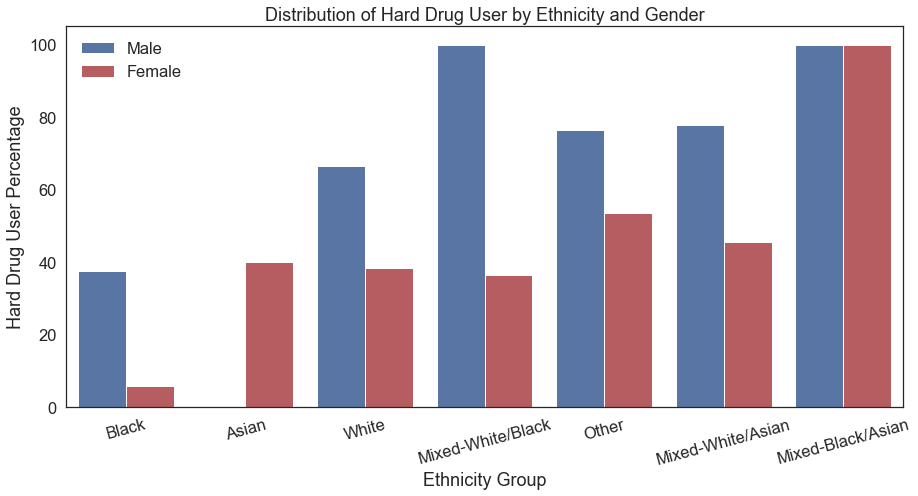

In [25]:
plot_demo(df,cat)

## Modeling:

In [26]:
df["drug_use"]=df[df[hard_drugs]>2][hard_drugs].count(axis=1)

In [27]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,hard,drug_use
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,2,0,False,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,2,0,2,3,0,4,0,True,3
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,1,0,0,False,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,2,0,0,0,0,2,0,True,1
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,1,0,0,2,2,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,3,3,0,0,0,5,True,1
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,0,0,3,5,4,4,5,0,True,2
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,0,2,0,2,0,2,6,0,True,4
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,0,0,3,3,0,3,4,0,True,2


## Correlation Heatmap

<ipython-input-28-9f9971add542>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


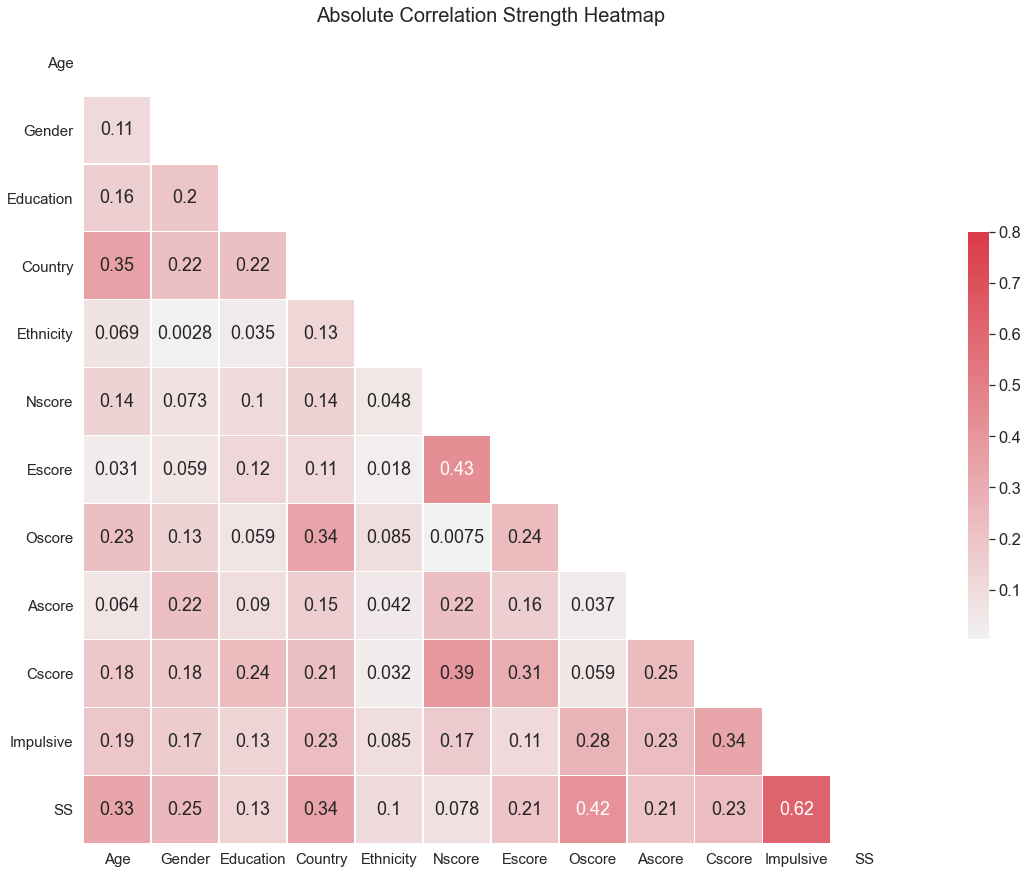

In [28]:
sns.set(style="white", font_scale = 1.5)

# Compute the correlation matrix
corr = abs(df.loc[:, "Age":"SS"].corr())

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, cmap=cmap, vmax=.8, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Absolute Correlation Strength Heatmap', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("")
plt.ylabel("")
#plt.savefig("graph/correlation.png")
plt.show()

## Splitting the data and creating Models

In [29]:
iv = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
dv = ['hard']
X_train, X_test,y_train,y_test = train_test_split(df[iv], df[dv], test_size= 0.3, random_state=17, stratify=df[dv])
y_train=y_train.values.astype(bool).ravel()
y_test=y_test.values.astype(bool).ravel()

In [30]:
# list of models to construct
model_list=["LogisticRegression", "SVC", "NuSVC", "GaussianNB", "DecisionTreeClassifier", "RandomForestClassifier", "AdaBoostClassifier", "KNeighborsClassifier", "CatBoostClassifier"]
#"XGBClassifier"

dct={"LogisticRegression": {"LogisticRegression": "LogisticRegression(max_iter=1e8)", "LogisticRegressionBalanced": "LogisticRegression(max_iter=1e8, class_weight='balanced')"}, "SVC": "SVC(probability= True)", "NuSVC": "NuSVC(nu=0.1, probability= True)","RandomForestClassifier" : {"RandomForestClassifier":"RandomForestClassifier()", "RandomForestClassifierBalanced":"RandomForestClassifier(class_weight='balanced')"}, "KNeighborsClassifier": {"KNeighborsClassifier":"KNeighborsClassifier(n_neighbors={})","KNeighborsClassifierWeightedDistance": "KNeighborsClassifier(weights='distance')"}}

In [31]:
def fit_model(model, m, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    if m=="CatBoostClassifier":
        y_pred=[eval(i) for i in y_pred]
    conf=confusion_matrix(y_test, y_pred)
    acc=accuracy_score(y_test,y_pred)
    rec=recall_score(y_test,y_pred)
    pr=precision_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    #contruct confusion matrix table
    
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    c=pd.DataFrame(conf, columns=["Predicted Non-User", "Predicted User"], index=["Actual Non-User", "Actual User"])
    c.index.name=m
    
    if m!="CatBoostClassifier":
        cm = plot_confusion_matrix(model, X_test, y_test, display_labels=["Non-User", "User"], cmap=plt.cm.Blues, normalize="true")
        cm.ax_.set_title(f"{m} Normalized confusion matrix")
        plt.show()    
    else:
        display(c)
    
    model_roc = roc_auc_score(y_test,  y_pred)
    fpr,tpr,thresholds=roc_curve(y_test, model.predict_proba(X_test)[:,1])
    return [m ,acc.round(2),pr.round(2),rec.round(2),f1.round(2), model_roc.round(2)], [fpr,tpr], c

In [32]:
def knn_elbow(knn, X_train, X_test, y_train, y_test):
    error_rate = []
    from math import log10, floor
    def round_1sf(x):
        return round(x, -int(floor(log10(abs(x)))))
    upper = int(round_1sf(X_train.shape[0]**0.5))
    for i in range(1,upper):
        model=eval(knn.format(i))
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        error_rate.append(np.mean(y_pred != y_test))
    print("Elbow curve for k")
    plt.figure(figsize=(10,6))
    plt.plot(range(1,upper),error_rate,color='blue', linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
    return int(error_rate.index(min(error_rate)))

In [33]:
def classification_models(models, X_train, X_test, y_train, y_test):
    performance=[]
    ROC=[]
    confusion=[]
    for m in models:
        if m in dct.keys() and type(dct[m])==str:
            model=eval(dct[m])
            p, r, c =fit_model(model, m, X_train, X_test, y_train, y_test)
            performance.append(p)
            ROC.append(r)
            confusion.append(c)
            
        elif m in dct.keys() and type(dct[m])==dict:
            for x in list(dct[m].keys()):
                if x == "KNeighborsClassifier":
                    i=knn_elbow(dct[m][x], X_train, X_test, y_train, y_test)
                    model=eval(dct[m][x].format(i))
                else:
                    model=eval(dct[m][x])
                p, r, c = fit_model(model, x, X_train, X_test, y_train, y_test)
                performance.append(p)
                ROC.append(r)
                confusion.append(c)

        else:
            model=eval(m)()
            p, r, c= fit_model(model, m, X_train, X_test, y_train, y_test)
            performance.append(p)
            ROC.append(r)
            confusion.append(c)
        
    perf=pd.DataFrame(performance, columns=["Model", "Accuracy", "Recall", "Precision", "F1", "ROC"]).set_index("Model")
    display(perf)
    return perf, ROC, confusion

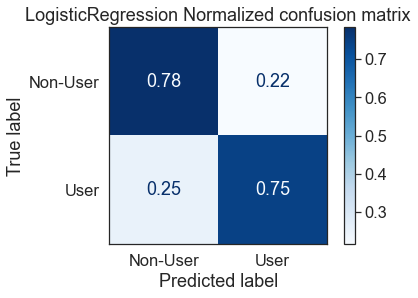

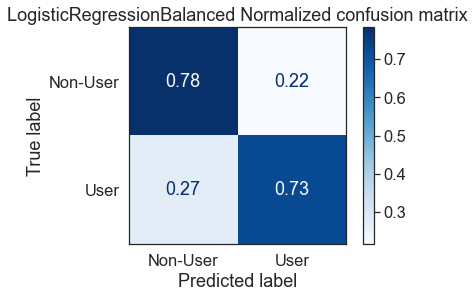

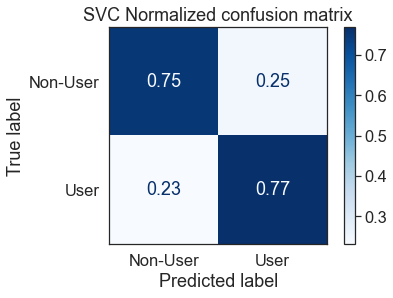

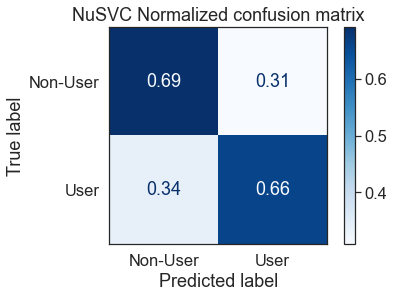

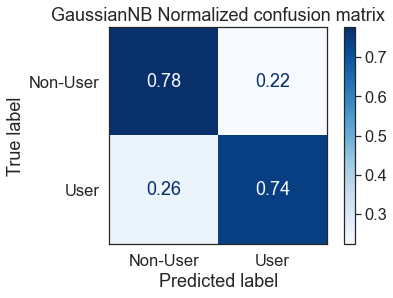

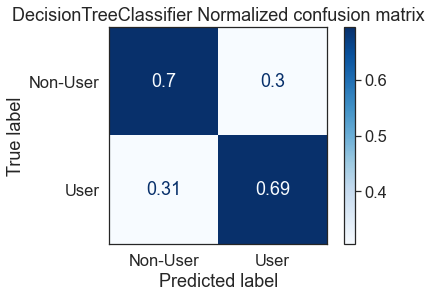

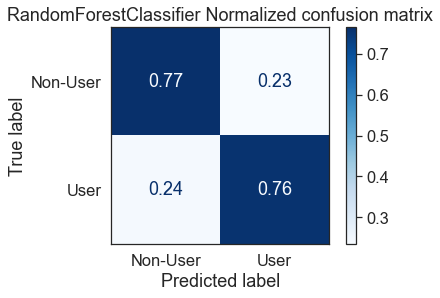

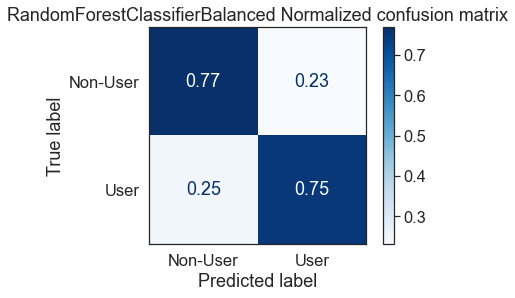

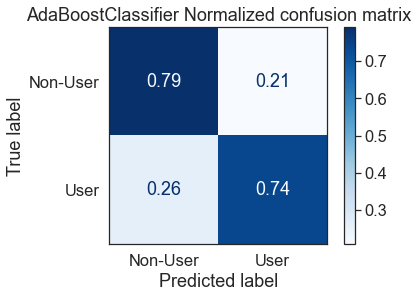

Elbow curve for k


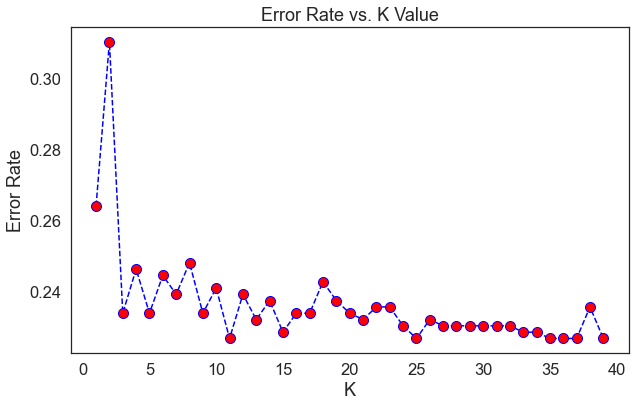

Minimum error:- 0.22695035460992907 at K = 10


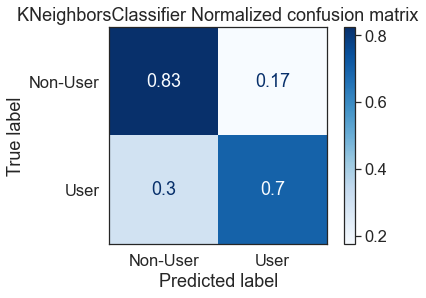

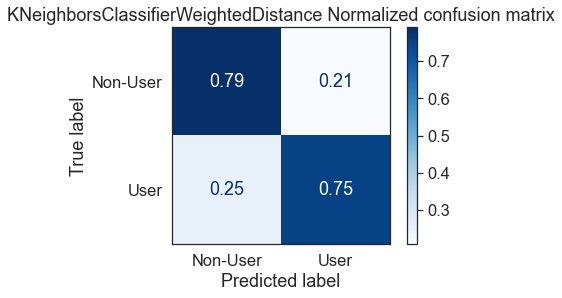

Learning rate set to 0.011573
0:	learn: 0.6871803	total: 72.6ms	remaining: 1m 12s
1:	learn: 0.6815627	total: 74.3ms	remaining: 37.1s
2:	learn: 0.6767132	total: 75.9ms	remaining: 25.2s
3:	learn: 0.6713974	total: 77.1ms	remaining: 19.2s
4:	learn: 0.6664751	total: 78.9ms	remaining: 15.7s
5:	learn: 0.6612118	total: 81.2ms	remaining: 13.5s
6:	learn: 0.6568434	total: 83.7ms	remaining: 11.9s
7:	learn: 0.6517006	total: 87.4ms	remaining: 10.8s
8:	learn: 0.6470575	total: 94.9ms	remaining: 10.4s
9:	learn: 0.6425626	total: 98ms	remaining: 9.71s
10:	learn: 0.6374333	total: 101ms	remaining: 9.05s
11:	learn: 0.6330886	total: 102ms	remaining: 8.44s
12:	learn: 0.6277690	total: 105ms	remaining: 7.95s
13:	learn: 0.6235129	total: 107ms	remaining: 7.53s
14:	learn: 0.6186259	total: 109ms	remaining: 7.14s
15:	learn: 0.6142064	total: 112ms	remaining: 6.88s
16:	learn: 0.6096237	total: 114ms	remaining: 6.57s
17:	learn: 0.6053145	total: 115ms	remaining: 6.29s
18:	learn: 0.6013744	total: 119ms	remaining: 6.15s
19

,Predicted Non-User,Predicted User
CatBoostClassifier,,
Actual Non-User,209,60
Actual User,70,225


,Accuracy,Recall,Precision,F1,ROC
Model,,,,,
LogisticRegression,0.76,0.79,0.75,0.77,0.77
LogisticRegressionBalanced,0.75,0.79,0.73,0.75,0.75
SVC,0.76,0.77,0.77,0.77,0.76
NuSVC,0.68,0.70,0.66,0.68,0.68
GaussianNB,0.76,0.78,0.74,0.76,0.76
DecisionTreeClassifier,0.70,0.71,0.69,0.70,0.70
RandomForestClassifier,0.76,0.78,0.76,0.77,0.76
RandomForestClassifierBalanced,0.76,0.78,0.75,0.77,0.76
AdaBoostClassifier,0.76,0.80,0.74,0.77,0.77


In [34]:
performance, ROC, confusion = classification_models(model_list, X_train, X_test, y_train, y_test)

## Hyperparameters Tuning Base Models

In [35]:
# list of models for GridSearch
grid_model_list=["LogisticRegression", "SVC", "RandomForestClassifier", "KNeighborsClassifier"]

# parameters for GridSearch
from math import log10, floor
def round_1sf(x):
    return round(x, -int(floor(log10(abs(x)))))
upper = int(round_1sf(X_train.shape[0]**0.5))
grid_dct={"LogisticRegression": dict(solver=['newton-cg', 'lbfgs', 'liblinear'],penalty=['l2'],C=[100, 10, 1.0, 0.1, 0.01, 0.001]), "SVC": dict(kernel=['poly', 'rbf', 'sigmoid'],C=[50, 10, 1.0, 0.1, 0.01],gamma=['scale']),"RandomForestClassifier" : dict(n_estimators=[10, 100, 1000],max_features=['sqrt', 'log2']), "KNeighborsClassifier": dict(n_neighbors=range(1, upper, 2),weights=['uniform', 'distance'],metric=['euclidean', 'manhattan', 'minkowski'])}

In [36]:
def grid_models(models, parameters, X_train, X_test, y_train, y_test):
    performance=[]
    ROC=[]
    confusion=[]
    for m in models:
        if m=="SVC":
            model=SVC(probability= True)
        elif m=="LogisticRegression":
            model=LogisticRegression(max_iter=1e8)
        else:
            model=eval(m)()
        
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        gs = GridSearchCV(estimator=model, param_grid=parameters[m], n_jobs=-1, cv=cv, scoring='recall',error_score=0, refit=True)
        grid_result = gs.fit(X_train, y_train)
        print("Best for %s: %f using %s" % (m, grid_result.best_score_, grid_result.best_params_))
        y_pred = gs.predict(X_test)
        
        conf=confusion_matrix(y_test, y_pred)
        acc=accuracy_score(y_test,y_pred)
        rec=recall_score(y_test,y_pred)
        pr=precision_score(y_test,y_pred)
        f1=f1_score(y_test,y_pred)
        np.set_printoptions(precision=2)

        # Plot normalized confusion matrix
        c=pd.DataFrame(conf, columns=["Predicted Non-User", "Predicted User"], index=["Actual Non-User", "Actual User"])
        c.index.name=m
        cm = plot_confusion_matrix(gs, X_test, y_test, display_labels=["Non-User", "User"], cmap=plt.cm.Blues, normalize="true")
        cm.ax_.set_title(f"{m} Normalized confusion matrix")
        plt.show()
        
        model_roc = roc_auc_score(y_test,  y_pred)
        fpr,tpr,thresholds=roc_curve(y_test, gs.predict_proba(X_test)[:,1])
        
        plt.style.use('seaborn-whitegrid')
        sns.set(style="white", font_scale = 1)
        graph_name="graph/ROC Grid {}.png"
    
        f, ax = plt.subplots(figsize=(10, 10))
        plt.clf()
        plt.plot(fpr,tpr, label=f'ROC curve={model_roc.round(2)}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{m} ROC Grid')
        plt.legend(loc="lower right")
        #plt.savefig(graph_name.format(names[i]) , transparent=True)
        plt.show()            
               
        performance.append([m ,acc.round(2),pr.round(2),rec.round(2),f1.round(2), model_roc.round(2)])
        ROC.append([fpr,tpr])
        confusion.append(c)
        
    perf=pd.DataFrame(performance, columns=["Model", "Accuracy", "Recall", "Precision", "F1", "ROC"]).set_index("Model")
    display(perf)
    return perf, ROC, confusion

Best for LogisticRegression: 0.826222 using {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}


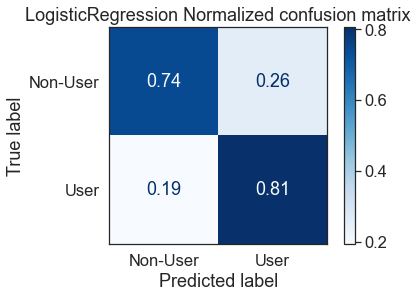

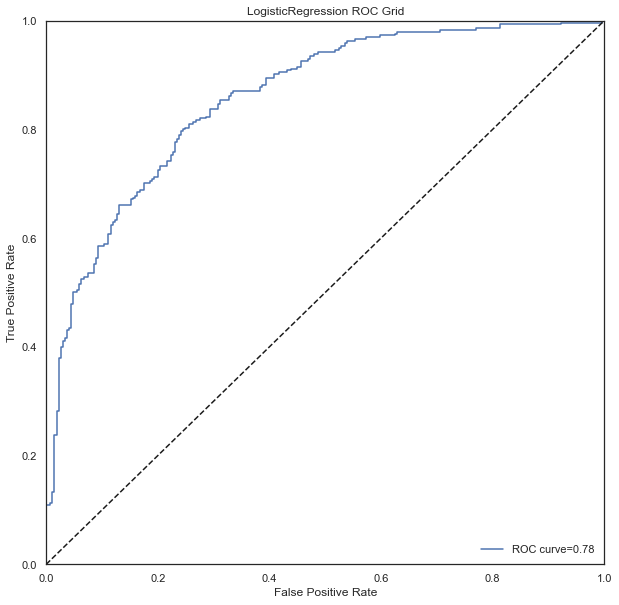

Best for SVC: 0.936367 using {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}


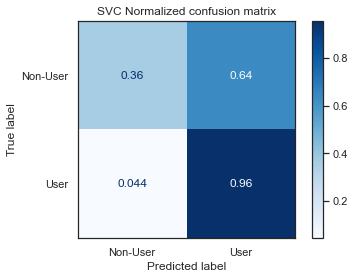

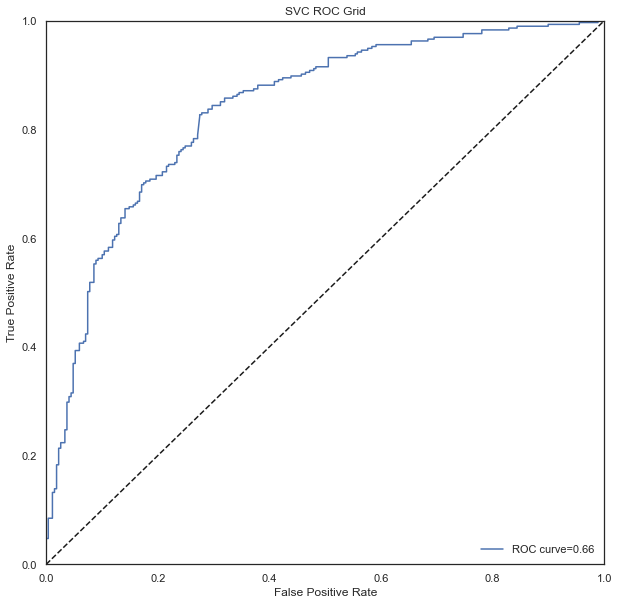

Best for RandomForestClassifier: 0.824773 using {'max_features': 'sqrt', 'n_estimators': 1000}


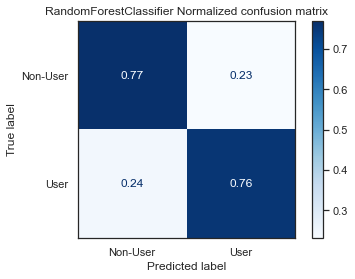

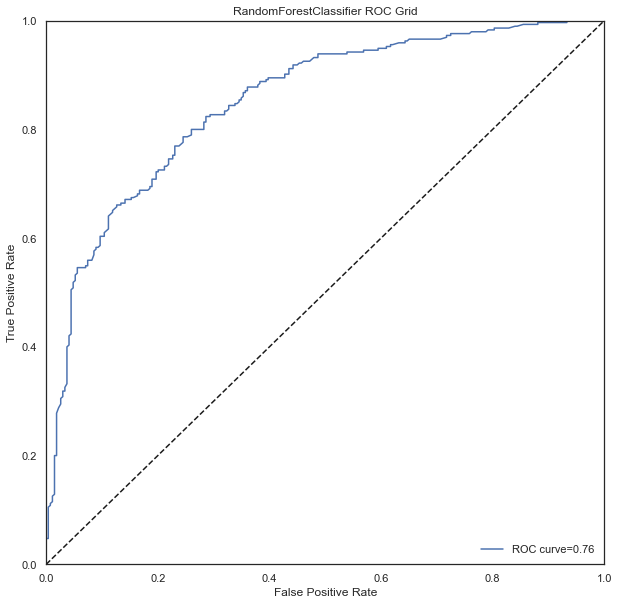

Best for KNeighborsClassifier: 0.779668 using {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


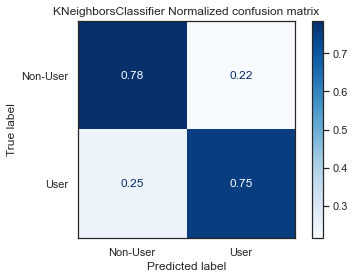

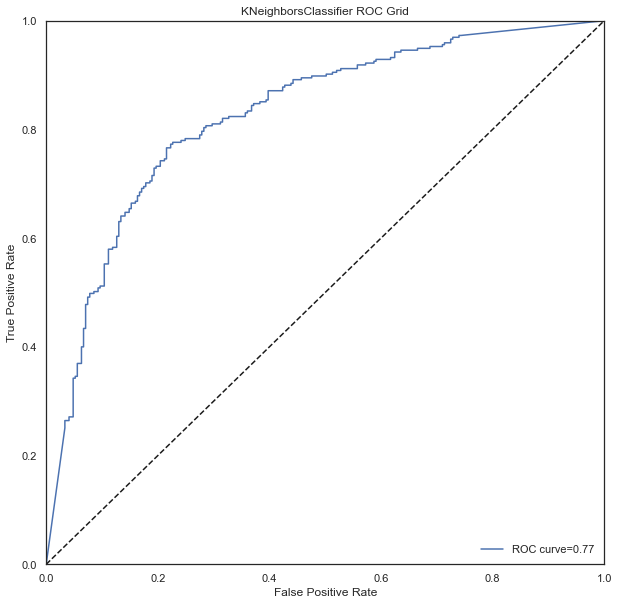

,Accuracy,Recall,Precision,F1,ROC
Model,,,,,
LogisticRegression,0.78,0.78,0.81,0.79,0.78
SVC,0.67,0.62,0.96,0.75,0.66
RandomForestClassifier,0.76,0.78,0.76,0.77,0.76
KNeighborsClassifier,0.77,0.79,0.75,0.77,0.77


In [37]:
grid_performance, grid_ROC, grid_confusion = grid_models(grid_model_list, grid_dct, X_train, X_test, y_train, y_test)

In [40]:
model = AdaBoostClassifier().fit(X_train, y_train)
importances = model.feature_importances_

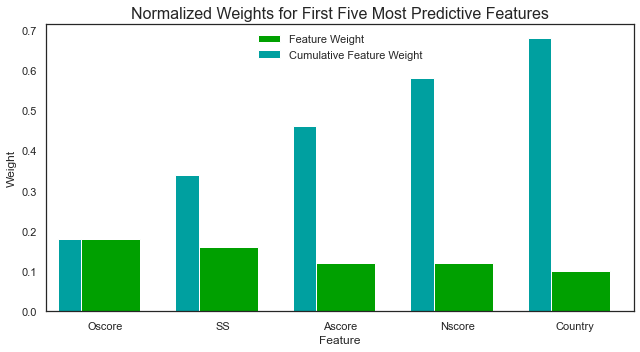

In [41]:
import visuals_script as vs
vs.feature_plot(importances, X_train, y_train)